In [26]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as plt
import scipy as sp
import warnings 
warnings.filterwarnings('ignore')

### 베타분포

C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44050 missing from curre

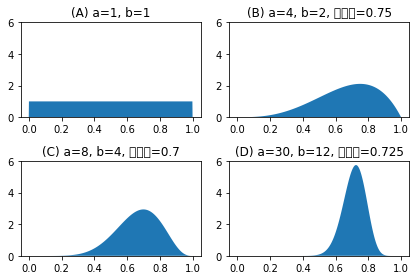

In [6]:
xx = np.linspace(0, 1, 1000)
plt.subplot(221)
plt.fill_between(xx, sp.stats.beta(1.0001, 1.0001).pdf(xx))
plt.ylim(0, 6)
plt.title("(A) a=1, b=1")
plt.subplot(222)
plt.fill_between(xx, sp.stats.beta(4, 2).pdf(xx))
plt.ylim(0, 6)
plt.title("(B) a=4, b=2, 최빈값={0}".format((4-1)/(4+2-2)))
plt.subplot(223)
plt.fill_between(xx, sp.stats.beta(8, 4).pdf(xx))
plt.ylim(0, 6)
plt.title("(C) a=8, b=4, 최빈값={0}".format((8-1)/(8+4-2)))
plt.subplot(224)
plt.fill_between(xx, sp.stats.beta(30, 12).pdf(xx))
plt.ylim(0, 6)
plt.title("(D) a=30, b=12, 최빈값={0}".format((30-1)/(30+12-2)))
plt.tight_layout()
plt.show()

### 감마분포

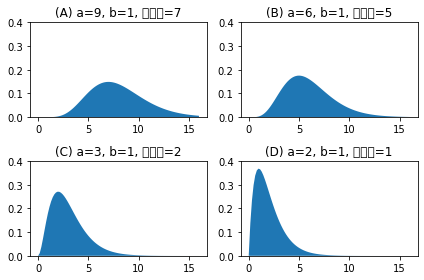

In [8]:
xx = np.linspace(0, 16, 100)
plt.subplot(221)
plt.fill_between(xx, sp.stats.gamma(8).pdf(xx))
plt.ylim(0, 0.4)
plt.title("(A) a=9, b=1, 최빈값=7")
plt.subplot(222)
plt.fill_between(xx, sp.stats.gamma(6).pdf(xx))
plt.ylim(0, 0.4)
plt.title("(B) a=6, b=1, 최빈값=5")
plt.subplot(223)
plt.fill_between(xx, sp.stats.gamma(3).pdf(xx))
plt.ylim(0, 0.4)
plt.title("(C) a=3, b=1, 최빈값=2")
plt.subplot(224)
plt.fill_between(xx, sp.stats.gamma(2).pdf(xx))
plt.ylim(0, 0.4)
plt.title("(D) a=2, b=1, 최빈값=1")
plt.tight_layout()
plt.show()

### 디리클레분포

In [9]:
# x, y, z가 양의 난수일 때 항상 x + y + z = 1이 되게 하려면 어떻게 해야될까요? 
# 모든 경우가 균등하게 나와야 합니다.

In [14]:
# alpha가 (1,1,1)인 디리클레 분포 -> 무정보 디리클레분포
X2 = sp.stats.dirichlet((1, 1, 1)).rvs(1000)

In [11]:
def plot_triangle(X, kind):
    n1 = np.array([1, 0, 0])
    n2 = np.array([0, 1, 0])
    n3 = np.array([0, 0, 1])
    n12 = (n1 + n2) / 2
    m1 = np.array([1, -1, 0])
    m2 = n3 - n12
    m1 = m1 / np.linalg.norm(m1)
    m2 = m2 / np.linalg.norm(m2)

    X1 = (X - n12).dot(m1)
    X2 = (X - n12).dot(m2)

    sns.jointplot(X1, X2, kind=kind, xlim=(-0.8, 0.8), ylim=(-0.1, 1.25))
    plt.show()

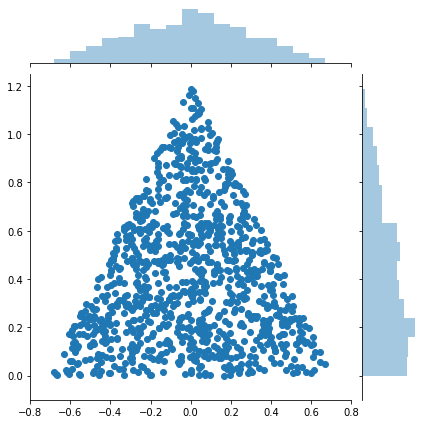

In [12]:
plot_triangle(X2, kind="scatter")

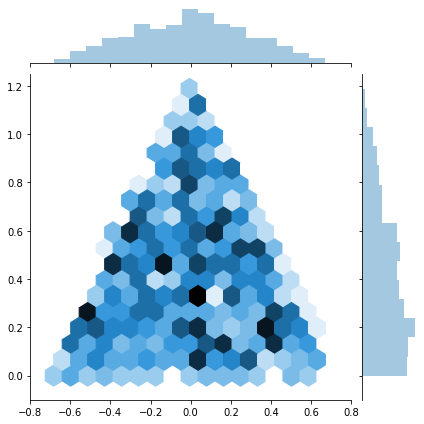

In [13]:
plot_triangle(X2, kind="hex")

#### 디리클레분포의 베이지안 추정

In [15]:
def project(x):
    n1 = np.array([1, 0, 0])
    n2 = np.array([0, 1, 0])
    n3 = np.array([0, 0, 1])
    n12 = (n1 + n2) / 2
    m1 = np.array([1, -1, 0])
    m2 = n3 - n12
    m1 = m1 / np.linalg.norm(m1)
    m2 = m2 / np.linalg.norm(m2)
    return np.dstack([(x - n12).dot(m1), (x - n12).dot(m2)])[0]


def project_reverse(x):
    n1 = np.array([1, 0, 0])
    n2 = np.array([0, 1, 0])
    n3 = np.array([0, 0, 1])
    n12 = (n1 + n2) / 2
    m1 = np.array([1, -1, 0])
    m2 = n3 - n12
    m1 = m1 / np.linalg.norm(m1)
    m2 = m2 / np.linalg.norm(m2)
    return x[:, 0][:, np.newaxis] * m1 + x[:, 1][:, np.newaxis] * m2 + n12


eps = np.finfo(float).eps * 10
X = project([[1 - eps, 0, 0], [0, 1 - eps, 0], [0, 0, 1 - eps]])

import matplotlib.tri as mtri
triang = mtri.Triangulation(X[:, 0], X[:, 1], [[0, 1, 2]])
refiner = mtri.UniformTriRefiner(triang)
triang2 = refiner.refine_triangulation(subdiv=6)
XYZ = project_reverse(np.dstack([triang2.x, triang2.y, 1 - triang2.x - triang2.y])[0])

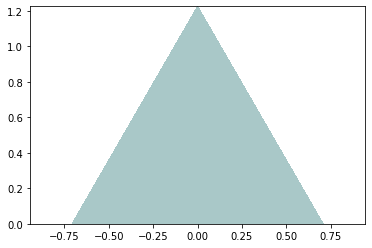

In [16]:
# alpha 1,1,1인 무정보 디리클레분포
pdf = sp.stats.dirichlet((1, 1, 1)).pdf(XYZ.T)
plt.tricontourf(triang2, pdf, cmap=plt.cm.bone)
plt.axis("equal")
plt.show()


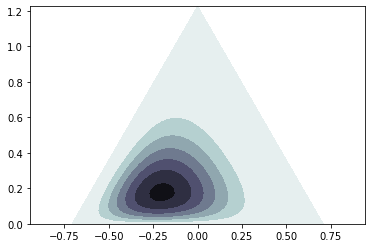

In [17]:
# 카테고리분포의 모수가 (0.3,0.5,0.2)라고 추정한 것
pdf = sp.stats.dirichlet((3, 5, 2)).pdf(XYZ.T)
plt.tricontourf(triang2, pdf, cmap=plt.cm.bone_r)
plt.axis("equal")
plt.show()

#### 연습문제 9.1.1

In [18]:
from sklearn.datasets import load_boston
boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)

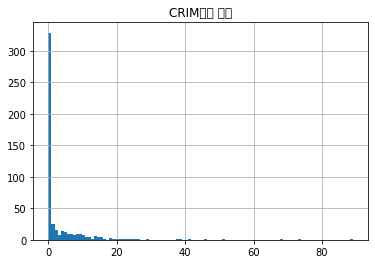

In [22]:
# 0근처값이 가장 많은 지수분포와 유사
df["CRIM"].hist(bins=100) 
plt.title("CRIM값의 분포") 
plt.show()

### 모수추정 방법
- 모멘트
- 최대가능도
- 베이즈

#### 모멘트 방법

C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47484 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46384 missing from c

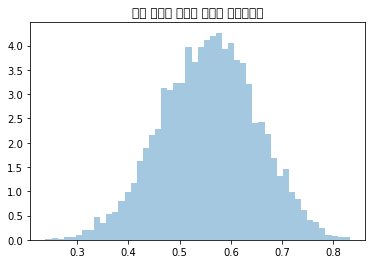

In [23]:
np.random.seed(0)
x = sp.stats.beta(15, 12).rvs(10000)

sns.distplot(x, kde=False, norm_hist=True)
plt.title("베타 분포를 따르는 표본의 히스토그램")
plt.show()


In [24]:
# 모멘트 방법으로 계산한 모수
def estimate_beta(x):
    x_bar = x.mean()
    s2 = x.var()
    a = x_bar * (x_bar * (1 - x_bar) / s2 - 1)
    b = (1 - x_bar) * (x_bar * (1 - x_bar) / s2 - 1)
    return a, b


params = estimate_beta(x)
print(params)

(15.346682046700685, 12.2121537049535)


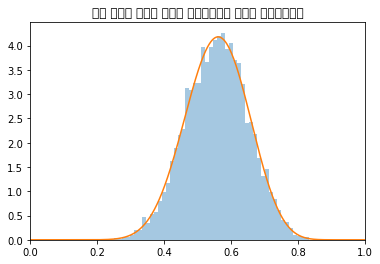

In [27]:
xx = np.linspace(0, 1, 1000)
sns.distplot(x, kde=False, norm_hist=True)
plt.plot(xx, sp.stats.beta(params[0], params[1]).pdf(xx))
plt.xlim(0, 1)
plt.title("베타 분포를 따르는 표본의 히스토그램과 추정된 확률밀도함수")
plt.show()

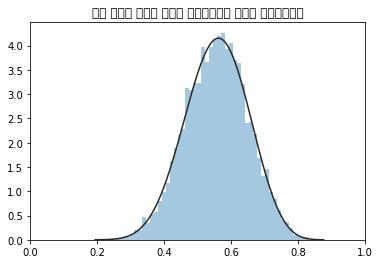

In [28]:
# seaborn의 distplot()함수에 모수추정기능을 사용
sns.distplot(x, kde=False, norm_hist=True, fit=sp.stats.beta)
plt.xlim(0, 1)
plt.title("베타 분포를 따르는 표본의 히스토그램과 추정된 확률밀도함수")
plt.show()

### 최대 가능도 추정법

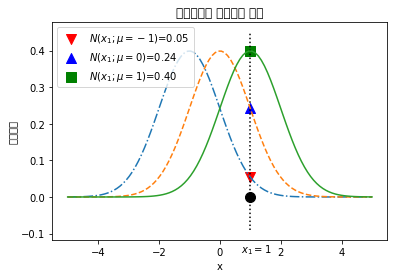

In [30]:
# 이 확률변수가 어떤 mu를 갖는 정규분포에서 나온것인지가 궁금!
x = np.linspace(-5, 5, 100)

p1 = sp.stats.norm(loc=-1).pdf(1)
p2 = sp.stats.norm(loc=0).pdf(1)
p3 = sp.stats.norm(loc=1).pdf(1)

plt.scatter(1, p1, s=100, c='r', marker='v', 
         label=r"$N(x_1;\mu=-1)$={:.2f}".format(np.round(p1, 2)))
plt.scatter(1, p2, s=100, c='b', marker='^', 
         label=r"$N(x_1;\mu=0)$={:.2f}".format(np.round(p2, 2)))
plt.scatter(1, p3, s=100, c='g', marker='s', 
         label=r"$N(x_1;\mu=1)$={:.2f}".format(np.round(p3, 2)))

plt.plot(x, sp.stats.norm(loc=-1).pdf(x), ls="-.")
plt.plot(x, sp.stats.norm(loc=0).pdf(x), ls="--")
plt.plot(x, sp.stats.norm(loc=1).pdf(x), ls="-")
plt.scatter(1, 0, s=100, c='k')
plt.vlines(1, -0.09, 0.45, linestyle=":")
plt.text(1-0.3, -0.15, "$x_1=1$")
plt.xlabel("x")
plt.ylabel("확률밀도")
plt.legend()
plt.title("최대가능도 추정법의 원리")
plt.show()
# N(x;mu=1)이라는 확률분포에서 x=1이 나올 가능도가 가장 높음

### 베르누이 분포의 모수추정

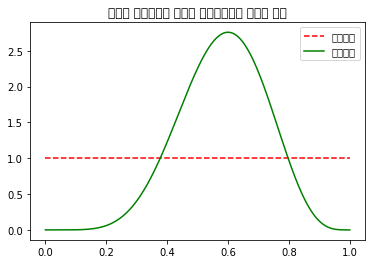

In [31]:
xx = np.linspace(0, 1, 1000)
a0, b0 = 1, 1
plt.plot(xx, sp.stats.beta(a0, b0).pdf(xx), c="r", ls="--", label="사전분포")
a1, b1 = 6 + 1, 4 + 1
plt.plot(xx, sp.stats.beta(a1, b1).pdf(xx), c="g", ls="-", label="사후분포")
plt.legend()
plt.title("베이즈 추정법으로 계산한 베르누이분포 모수의 분포")
plt.show()

#### 연습문제 9.3.1
```
상품 A와 상품 B의 베르누이 모수의 사후분포의 하이퍼파라미터를 구하고 각각 사후분포 확률밀도함수를 그려라.
- 상품 A: 전체 평가의견 3개, 좋아요 2개, 싫어요 1개
- 상품 B: 전체 평가의견 100개, 좋아요 60개, 싫어요 40개
- 상품 A의 모수:  2/3=0.67 
- 상품 B의 모수:  60/100=0.60
```

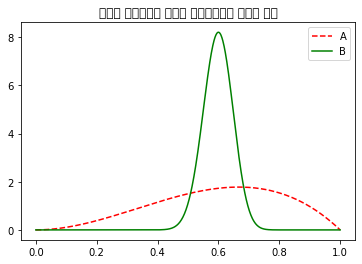

In [36]:
xx = np.linspace(0, 1, 1000)
a0, b0 = 3 ,2
plt.plot(xx, sp.stats.beta(a0, b0).pdf(xx), c="r", ls="--", label="A")
a1, b1 = 61, 41
plt.plot(xx, sp.stats.beta(a1, b1).pdf(xx), c="g", ls="-", label="B")
plt.legend()
plt.title("베이즈 추정법으로 계산한 베르누이분포 모수의 분포")
plt.show()

In [37]:
# 위경우 상품 A를 샀을때 mu값이 B를 샀을때 보다 높을 확률??

초기 추정: 모드 = 모름
0차 추정: 모드 = 0.64
1차 추정: 모드 = 0.69
2차 추정: 모드 = 0.65


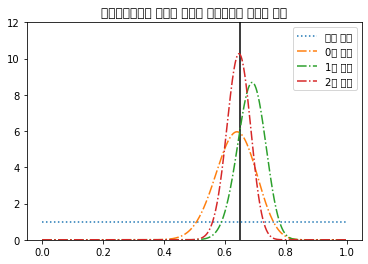

In [39]:
# 순차적 계산이 가능한 베이즈 추정법
mu0 = 0.65
a, b = 1, 1
print("초기 추정: 모드 = 모름")

xx = np.linspace(0, 1, 1000)
plt.plot(xx, sp.stats.beta(a, b).pdf(xx), ls=":", label="초기 추정")

np.random.seed(0)

for i in range(3):
    x = sp.stats.bernoulli(mu0).rvs(50)
    N0, N1 = np.bincount(x, minlength=2)
    a, b = a + N1, b + N0
    plt.plot(xx, sp.stats.beta(a, b).pdf(xx), ls="-.", label="{}차 추정".format(i))
    print("{}차 추정: 모드 = {:4.2f}".format(i, (a - 1)/(a + b - 2)))


plt.vlines(x=0.65, ymin=0, ymax=12)
plt.ylim(0, 12)
plt.legend()
plt.title("베르누이분포의 모수를 베이즈 추정법으로 추정한 결과")
plt.show()

### 카테고리부포의 모수추정

### 예제
```
어떤 식물원에 세 종류의 붓꽃이 있다. 
이 세 붓꽃의 비율을 카테고리분포로 나타내고자 한다. 
카테고리분포의 모수는 디리클리분포로 표현한다.
```

In [40]:
def plot_dirichlet(alpha, n):

    def project(x):
        n1 = np.array([1, 0, 0])
        n2 = np.array([0, 1, 0])
        n3 = np.array([0, 0, 1])
        n12 = (n1 + n2)/2
        m1 = np.array([1, -1, 0])
        m2 = n3 - n12
        m1 = m1/np.linalg.norm(m1)
        m2 = m2/np.linalg.norm(m2)
        return np.dstack([(x-n12).dot(m1), (x-n12).dot(m2)])[0]

    def project_reverse(x):
        n1 = np.array([1, 0, 0])
        n2 = np.array([0, 1, 0])
        n3 = np.array([0, 0, 1])
        n12 = (n1 + n2)/2
        m1 = np.array([1, -1, 0])
        m2 = n3 - n12
        m1 = m1/np.linalg.norm(m1)
        m2 = m2/np.linalg.norm(m2)
        return x[:, 0][:, np.newaxis] * m1 + x[:, 1][:, np.newaxis] * m2 + n12

    eps = np.finfo(float).eps * 10
    X = project([[1-eps, 0, 0], [0, 1-eps, 0], [0, 0, 1-eps]])

    import matplotlib.tri as mtri

    triang = mtri.Triangulation(X[:, 0], X[:, 1], [[0, 1, 2]])
    refiner = mtri.UniformTriRefiner(triang)
    triang2 = refiner.refine_triangulation(subdiv=6)
    XYZ = project_reverse(
        np.dstack([triang2.x, triang2.y, 1-triang2.x-triang2.y])[0])

    pdf = sp.stats.dirichlet(alpha).pdf(XYZ.T)
    plt.tricontourf(triang2, pdf, cmap=plt.cm.bone_r)
    plt.axis("equal")
    plt.title("정규분포 확률변수의 모수를 베이즈 추정법으로 추정한 결과: {} 추정".format(n))
    plt.show()

mu0 = np.array([0.3, 0.5, 0.2])

np.random.seed(0)

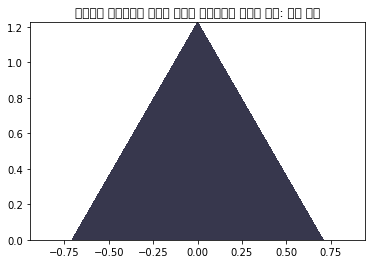

In [41]:
a0 = np.ones(3)
plot_dirichlet(a0, "초기")

종류별 붓꽃의 수 =[10 32  8]
1차 추정 하이퍼모수: [0.2  0.64 0.16]


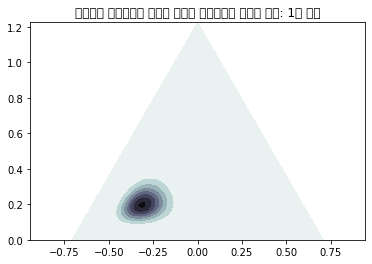

In [42]:
# 만약 1차로 측정한 종류별 붓꽃의 수가 각각 9, 29, 12개였다면 
# 디리클리분포의 하이퍼모수는
x1 = np.random.choice(3, 50, p=mu0)
N1 = np.bincount(x1, minlength=3)
a1 = a0 + N1

print("종류별 붓꽃의 수 ={}".format(N1))
print("1차 추정 하이퍼모수:", (a1 - 1)/(a1.sum() - 3))

plot_dirichlet(a1, "1차")

### 정규분포이 기댓값 모수 추정

0차 추정: 1.98
1차 추정: 2.07
2차 추정: 2.05
3차 추정: 2.03


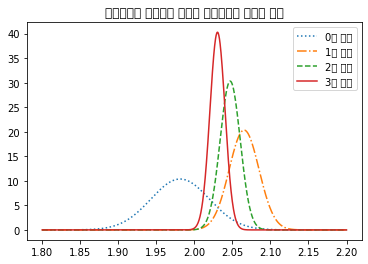

In [43]:
mu, sigma2 = 2, 4
mu0, sigma20 = 0, 1
xx = np.linspace(1.8, 2.2, 1000)
np.random.seed(1)
N = 100
ls = [":", "-.", "--", "-"]
for i in range(4):
    x = sp.stats.norm(mu).rvs(N)
    mu0 = sigma2/(N*sigma20 + sigma2) * mu0 + \
        (N*sigma20)/(N*sigma20 + sigma2)*x.mean()
    sigma20 = 1/(1/sigma20 + N/sigma2)
    plt.plot(xx, sp.stats.norm(mu0, sigma20).pdf(xx), ls=ls[i], label="{}차 추정".format(i))
    print("{}차 추정: {:4.2f}".format(i, mu0))
plt.legend()
plt.title("정규분포의 기댓값을 베이즈 추정법으로 추정한 결과")
plt.show()